Plans
1. where does the data come from. email the owner.
2. need to do the descriptive stats

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import re
import emoji
import json
from googletrans import Translator
translator = Translator()
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('stopwords-es')
from IPython.display import clear_output

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/susanliang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading stopwords-es: Package 'stopwords-es' not
[nltk_data]     found in index


In [2]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [3]:
# dataset = pd.read_csv('tinder_google_play_reviews.csv')
dataset = pd.read_csv('/Users/susanliang/Desktop/CEU-General/3rd year/Research Method/profiles_2021-11-10.csv', low_memory=False)
# column_list_dating = pd.DataFrame(list(dataset.columns))
# column_list_dating.to_csv('column_list_dating.csv')

In [4]:
dating_column = pd.read_csv('/Users/susanliang/Desktop/CEU-General/3rd year/Research Method/column_list_dating.csv')
dating_column = dating_column.drop(dating_column.columns[dating_column.columns.str.contains('Unnamed', case=False)], axis=1)

In [5]:
# display the last 5 columns
last_10_columns = dataset.iloc[:, -5:]
last_10_columns.head(10)

,user.interestedIn,user.jobs,user.schools,user.spotify,userId
0,F,[],[],False,00b74e27ad1cbb2ded8e907fcc49eaaf
1,F,[],[],False,024610702baf540af5637873cd1534e9
2,F,[],[],False,0a5e3dd8489fe67485ddb7d6adb26ebd
3,F,[],[],False,048dd37565ad9cbc24c163ffedffbf58
4,F,"[{""companyDisplayed"":false,""titleDisplayed"":tr...","[{""displayed"":true,""name"":""Humboldt-Universitä...",False,0eb998fdde77f9c123c07eace18a5cc1
5,F,"[{""companyDisplayed"":true,""titleDisplayed"":fal...","[{""displayed"":true,""id"":""112432842116375"",""nam...",False,10a8c197447a3991d64136b315d6e87e
6,M,"[{""companyDisplayed"":false,""titleDisplayed"":fa...","[{""displayed"":false,""name"":""Stanford""}]",False,1a6bc90a124bed79741b441929c4d365
7,F,[],"[{""displayed"":true,""name"":""Universität St. Gal...",False,1c2f3d5f9d2ca312136fdf6e018a177d
8,M,[],[],True,1e74b4cb4b126a8f34b2d9b1fda0a92f
9,M,[],[],True,2057ea510896a025db5790675c90b7d6


### To do: Need to make sure it is random and representative sample

In [6]:
unique_column_groups = []
for column_name in list(dating_column.iloc[:, 0]):
    parts = re.split(r'(\d+)', column_name)
    clean_parts = [part for part in parts if not part.isdigit()]
    unique_group = ''.join(clean_parts)
    if unique_group not in unique_column_groups:
        unique_column_groups.append(unique_group)

cleaned_column_names = [name.replace(".--", "") for name in unique_column_groups]
pd.DataFrame(cleaned_column_names)

,0
0,__v
1,_id
2,appOpens
3,conversations
4,conversationsMeta.averageConversationLength
5,conversationsMeta.averageConversationLengthInDays
6,conversationsMeta.longestConversation
7,conversationsMeta.longestConversationInDays
8,conversationsMeta.medianConversationLength
9,conversationsMeta.medianConversationLengthInDays


In [7]:
# not_nan_values = dataset[dataset.filter(like='conversations2020').notna()]
# not_nan_values

#### Age Filter. Older than 18 when they create their profile

In [8]:
dataset['user.createDate'] = pd.to_datetime(dataset['user.createDate'])
dataset['user.birthDate'] = pd.to_datetime(dataset['user.birthDate'])
dataset['age_at_creation'] = (dataset['user.createDate'] - dataset['user.birthDate']).astype('<m8[Y]')
filtered_df = dataset[dataset['age_at_creation'] > 18]
filtered_df = filtered_df.drop(columns=['age_at_creation'])
dropped = len(dataset) - len(filtered_df)
dropped

138

#### Country Filter. Only keep U.S.

In [9]:
pd.set_option('display.max_rows', 20)
filtered_df[['user.country', 'user.cityName']]

,user.country,user.cityName
0,Norway,Trondheim
1,VA,Richmond
2,NaN,NaN
3,Alberta,Edmonton
4,NaN,NaN
...,...,...
1204,Netherlands,Utrecht
1205,Österreich,Wien
1206,British Columbia,Vancouver
1207,United Kingdom,London


In [10]:
pd.set_option('display.max_rows', 20)
pd.DataFrame(filtered_df['user.country'].value_counts())

,user.country
CA,25
United Kingdom,17
California,17
England,17
Germany,17
...,...
País Vasco,1
Łódzkie,1
北京市,1
NL,1


In [11]:
country_counts = filtered_df['user.country'].dropna().value_counts()
print(country_counts)


CA                25
United Kingdom    17
California        17
England           17
Germany           17
                  ..
País Vasco         1
Łódzkie            1
北京市                1
NL                 1
South Africa       1
Name: user.country, Length: 227, dtype: int64


In [12]:
country_or_city_listnon_us_locations = [
    'United Kingdom', 'Germany', 'France', 'Finland', 'Deutschland', 'Suomi',
    'Sverige', 'Danmark', 'Italia', 'Ireland', 'Belgium', 'Brasil', 'Polska',
    'Switzerland', 'Netherlands', 'Canada', 'België', 'Austria', 'Denmark',
    'Scotland', 'Italy', 'España', 'Portugal', 'Österreich', 'Norway', 'Schweiz',
    'Magyarország', 'Australia', 'New Zealand', 'Česká republika', 'Romania',
    'Groningen', 'Zürich', 'Israel', 'Ukraine', 'Украина', 'Spain', 'Estonia',
    'Lithuania', 'Community of Madrid', 'Suisse', 'Česko', 'Nederland', 'Slovakia',
    'British Columbia', 'Jönköpings län', 'Vaud', 'Stockholm', 'Gelderland',
    'Berlin', 'Reino Unido', "Provence-Alpes-Côte d'Azur",
    'Lazio', 'Tyrol', 'Thailand', 'Hlavní město Praha', 'Россия', 'Incheon',
    'Seoul', 'Grand Est', 'Alicante', 'Iași County', 'Kujawsko-Pomorskie', 'Jilin',
    'Hallands län', 'Andhra Pradesh', 'Croatia', 'Morocco',
    'Nordjylland', 'Japan', 'Pernambuco', 'Singapore', 'Styria',
    'Silesian Voivodeship', 'Județul Iași', 'Bulgaria', 'Greece', 'Zuid-Holland',
    'Santa Catarina', 'Piemonte', 'Comunidad de Madrid',
    'Auvergne-Rhône-Alpes', 'Minas Gerais', 'Aargau', 'Belgique', 'Sachsen',
    'Norge', 'Zagreb', 'Russia', 'Lituanie', 'Эстония', 'Polonya',
    'Guatemala', 'Friuli-Venezia Giulia', 'Yucatán', 'Hong Kong SAR, China',
    'South Korea', 'Schleswig-Holstein', 'CDMX',
     'Lombardy', 'Argentina', 'Luxembourg',
    'Federal Territory of Kuala Lumpur', 'Taiwan', 'Canarias', 'Turkey', 'Iceland',
    'Rogaland', 'מחוז תל אביב', 'Veneto', 'Australian Capital Territory', 
    'Brazil', 'Slovensko', 'Σουηδία',
    'County Dublin', 'Türkiye', 'Беларусь', 'Județul Sibiu', 'Réunion', 'Jalisco',
    'Île-de-France', 'País Vasco', 'Łódzkie', '北京市', 'NL', 'South Africa', 'England', 
    'Poland','Sweden','Nordrhein-Westfalen',  'Baden-Württemberg',  'Małopolskie',         
    'Victoria', 'Uusimaa','Catalunya', 'Hungary', 'Bayern', 'Rio Grande do Sul','Cluj County',         
    'County Cork','Niedersachsen','Hessen', 'North Holland', 'Polonia',  'Rheinland-Pfalz',     
    'Francia', 'Oost-Vlaanderen','Hovedstaden','Nariño','Dolnośląskie','Québec','Suède',
    'Czechia', 'Mazowieckie', 'Alberta', 'Puerto Rico', 'North Rhine-Westphalia', 'Sydney'
]

In [13]:
country_or_city_list = country_counts.index.tolist()
us_country_or_city_list_filtered1 = [value for value in country_or_city_list if value not in country_or_city_listnon_us_locations]
us_country_or_city_list_filtered1.append(np.nan)
filtered_df = filtered_df[filtered_df['user.country'].isin(us_country_or_city_list_filtered1)]
filtered_df


,__v,_id,appOpens.2014-11-10,appOpens.2014-11-12,appOpens.2014-11-13,appOpens.2014-11-14,appOpens.2014-11-15,appOpens.2014-11-16,appOpens.2014-11-17,appOpens.2014-11-18,...,user.education,user.educationLevel,user.gender,user.genderFilter,user.instagram,user.interestedIn,user.jobs,user.schools,user.spotify,userId
1,0,024610702baf540af5637873cd1534e9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has high school and/or college education,Has high school and/or college education,M,F,False,F,[],[],False,024610702baf540af5637873cd1534e9
2,0,0a5e3dd8489fe67485ddb7d6adb26ebd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,[],[],False,0a5e3dd8489fe67485ddb7d6adb26ebd
4,0,0eb998fdde77f9c123c07eace18a5cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,True,F,"[{""companyDisplayed"":false,""titleDisplayed"":tr...","[{""displayed"":true,""name"":""Humboldt-Universitä...",False,0eb998fdde77f9c123c07eace18a5cc1
6,0,1a6bc90a124bed79741b441929c4d365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has high school and/or college education,Has high school and/or college education,F,M,False,M,"[{""companyDisplayed"":false,""titleDisplayed"":fa...","[{""displayed"":false,""name"":""Stanford""}]",False,1a6bc90a124bed79741b441929c4d365
7,0,1c2f3d5f9d2ca312136fdf6e018a177d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,[],"[{""displayed"":true,""name"":""Universität St. Gal...",False,1c2f3d5f9d2ca312136fdf6e018a177d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0,50e1134349bc4378cd7b2e904bc0d7b9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has high school and/or college education,Has high school and/or college education,M,F,False,F,[],[],False,50e1134349bc4378cd7b2e904bc0d7b9
1195,0,b0507394947574a3fac0fb70e0db32ea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,[],[],False,b0507394947574a3fac0fb70e0db32ea
1197,0,28a928d17d3a5f5449b16abcd8ebdf47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,"[{""companyDisplayed"":false,""titleDisplayed"":tr...","[{""displayed"":true,""name"":""University of Dunde...",True,28a928d17d3a5f5449b16abcd8ebdf47
1203,0,eac80be180cbe0c7f37a3c68203a04b4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,F,M,True,M,[],NaN,False,eac80be180cbe0c7f37a3c68203a04b4


#### Filter uear 2017-2021

In [14]:
# pd.DataFrame(filtered_df3['user.cityName'].value_counts().index.tolist()).to_csv('testtest.city.csv')

In [15]:
# filtered_df3['conversations'].to_csv('conversations.csv')

In [16]:
import re

column_names = filtered_df.columns

# Define a function to filter columns based on prefix and date range
def filter_columns(columns, prefix, start_year, end_year):
    start_date = f"{start_year}-01-01"
    end_date = f"{end_year}-12-31"
    return [col for col in columns if (col.startswith(prefix) and start_date <= extract_date(col) <= end_date) or not col.startswith(prefix)]

# Define a function to extract the date from the column name
def extract_date(column_name):
    match = re.search(r'\d{4}-\d{2}-\d{2}', column_name)
    return match.group() if match else None

# Define a list of column prefixes
column_prefixes = [
    'appOpens.',
    'matches.',
    'messages.received.',
    'messages.sent.',
    'messagesReceived.',
    'messagesSent.',
    'swipeLikes.',
    'swipePasses.',
    'swipes.likes.',
    'swipes.passes.'
]

# Set the start and end years
start_year = '2017'
end_year = '2023'

# Apply the filters sequentially
selected_columns = column_names
for prefix in column_prefixes:
    selected_columns = filter_columns(selected_columns, prefix, start_year, end_year)

# Create a new DataFrame with the selected columns
filtered_df2 = filtered_df[selected_columns]
filtered_df2


,__v,_id,appOpens.2017-01-01,appOpens.2017-01-02,appOpens.2017-01-03,appOpens.2017-01-04,appOpens.2017-01-05,appOpens.2017-01-06,appOpens.2017-01-07,appOpens.2017-01-08,...,user.education,user.educationLevel,user.gender,user.genderFilter,user.instagram,user.interestedIn,user.jobs,user.schools,user.spotify,userId
1,0,024610702baf540af5637873cd1534e9,16.0,16.0,13.0,5.0,3.0,10.0,4.0,5.0,...,Has high school and/or college education,Has high school and/or college education,M,F,False,F,[],[],False,024610702baf540af5637873cd1534e9
2,0,0a5e3dd8489fe67485ddb7d6adb26ebd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,[],[],False,0a5e3dd8489fe67485ddb7d6adb26ebd
4,0,0eb998fdde77f9c123c07eace18a5cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,True,F,"[{""companyDisplayed"":false,""titleDisplayed"":tr...","[{""displayed"":true,""name"":""Humboldt-Universitä...",False,0eb998fdde77f9c123c07eace18a5cc1
6,0,1a6bc90a124bed79741b441929c4d365,15.0,11.0,9.0,26.0,5.0,9.0,29.0,26.0,...,Has high school and/or college education,Has high school and/or college education,F,M,False,M,"[{""companyDisplayed"":false,""titleDisplayed"":fa...","[{""displayed"":false,""name"":""Stanford""}]",False,1a6bc90a124bed79741b441929c4d365
7,0,1c2f3d5f9d2ca312136fdf6e018a177d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,[],"[{""displayed"":true,""name"":""Universität St. Gal...",False,1c2f3d5f9d2ca312136fdf6e018a177d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0,50e1134349bc4378cd7b2e904bc0d7b9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has high school and/or college education,Has high school and/or college education,M,F,False,F,[],[],False,50e1134349bc4378cd7b2e904bc0d7b9
1195,0,b0507394947574a3fac0fb70e0db32ea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,[],[],False,b0507394947574a3fac0fb70e0db32ea
1197,0,28a928d17d3a5f5449b16abcd8ebdf47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,"[{""companyDisplayed"":false,""titleDisplayed"":tr...","[{""displayed"":true,""name"":""University of Dunde...",True,28a928d17d3a5f5449b16abcd8ebdf47
1203,0,eac80be180cbe0c7f37a3c68203a04b4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,F,M,True,M,[],NaN,False,eac80be180cbe0c7f37a3c68203a04b4


In [17]:
# pd.DataFrame(filtered_df2.columns.tolist()).to_csv('col_list_cleaned.csv')

In [18]:
import pandas as pd

# Assuming df is your DataFrame
df_received = filtered_df2.filter(regex='^messages\.received\.', axis=1)
df_receivedReceived = filtered_df2.filter(regex='^messagesReceived\.', axis=1)

different_columns = []
for col in df_received.columns:
    if col in df_receivedReceived.columns and not df_received[col].equals(df_receivedReceived[col]):
        different_columns.append(col)

if not different_columns:
    print("The data in corresponding columns from 'messages.received.' and 'messagesReceived.' are the same.")
else:
    print("The data in corresponding columns from 'messages.received.' and 'messagesReceived.' are different.")
    print("Different columns:", different_columns)
df_received = filtered_df2.filter(regex='^messages\.received\.', axis=1)
df_receivedReceived = filtered_df2.filter(regex='^messagesReceived\.', axis=1)
def extract_dates(df):
    return pd.to_datetime(df.columns.str.extract(r'(\d{4}-\d{2}-\d{2})', expand=False), errors='coerce')
dates_received = extract_dates(df_received)
dates_receivedReceived = extract_dates(df_receivedReceived)
if dates_received.equals(dates_receivedReceived):
    print("The date ranges for corresponding columns from 'messages.received.' and 'messagesReceived.' are the same.")
else:
    print("The date ranges for corresponding columns from 'messages.received.' and 'messagesReceived.' are different.")
    print("Date range for 'messages.received.':", dates_received.min(), "to", dates_received.max())
    print("Date range for 'messagesReceived.':", dates_receivedReceived.min(), "to", dates_receivedReceived.max())


The data in corresponding columns from 'messages.received.' and 'messagesReceived.' are the same.
The date ranges for corresponding columns from 'messages.received.' and 'messagesReceived.' are the same.


In [19]:
prefixes_to_drop = ['messagesReceived.', 'messagesSent.', 'swipeLikes.', 'swipePasses.']
columns_to_keep = [col for col in filtered_df2.columns if not any(col.startswith(prefix) for prefix in prefixes_to_drop)]
filtered_df3 = filtered_df2[columns_to_keep]
# filtered_df3.to_csv('test.csv')


In [20]:
pd.set_option('display.max_rows', 40)
unique_column_groups = []
for column_name in list(filtered_df3.columns.to_list()):
    parts = re.split(r'(\d+)', column_name)
    clean_parts = [part for part in parts if not part.isdigit()]
    unique_group = ''.join(clean_parts)
    if unique_group not in unique_column_groups:
        unique_column_groups.append(unique_group)

cleaned_column_names = [name.replace(".--", "") for name in unique_column_groups]
pd.DataFrame(cleaned_column_names)


,0
0,__v
1,_id
2,appOpens
3,conversations
4,conversationsMeta.averageConversationLength
5,conversationsMeta.averageConversationLengthInDays
6,conversationsMeta.longestConversation
7,conversationsMeta.longestConversationInDays
8,conversationsMeta.medianConversationLength
9,conversationsMeta.medianConversationLengthInDays


In [21]:
filtered_df3 = filtered_df3.reset_index(drop=True)
filtered_df3['user.createDate']

0     2016-07-12 02:26:46.774000+00:00
1     2019-07-01 19:17:54.560000+00:00
2     2017-11-17 23:30:37.231000+00:00
3     2016-01-01 09:30:07.551000+00:00
4     2019-10-06 07:28:31.380000+00:00
                    ...               
633   2016-01-13 22:03:09.660000+00:00
634   2021-10-04 16:04:00.023000+00:00
635   2021-06-26 23:37:30.823000+00:00
636   2019-02-18 06:26:35.011000+00:00
637   2021-10-19 16:42:25.740000+00:00
Name: user.createDate, Length: 638, dtype: datetime64[ns, UTC]

#### up until now, the dataset is filtered. It is called filtered_df3

#### App using frequency analysis

##### Total volume

In [ ]:
selected_columns = ['_id'] + [col for col in filtered_df3.columns if col.startswith('appOpens.')]
df = filtered_df3[selected_columns]
df = df.set_index('_id')
total_opens_per_day = df.sum(axis=0)


lockdown_date = pd.to_datetime('2020-02-25')
distancing_date = pd.to_datetime('2020-03-28')
mask_date = pd.to_datetime('2020-04-03')
mask_again_date = pd.to_datetime('2020-07-14')
vaccine_date = pd.to_datetime('2020-12-23')
transport_mask_date = pd.to_datetime('2021-02-02')
travel_vaccinated_date = pd.to_datetime('2021-04-02')
no_mask_requirement_date = pd.to_datetime('2022-05-31')

# Dictionary of dates, corresponding legends, and colors
important_dates = {
    lockdown_date: {'legend': 'Lockdown: February 25, 2020', 'color': 'r'},
    distancing_date: {'legend': 'Social Distancing: March 28, 2020', 'color': 'g'},
    mask_date: {'legend': 'Mask: April 3, 2020', 'color': 'b'},
    mask_again_date: {'legend': 'Mask Again: July 14, 2020', 'color': 'c'},
    vaccine_date: {'legend': 'More Vaccine: December 23, 2020', 'color': 'm'},
    transport_mask_date: {'legend': 'Mask in Transportation: February 2, 2021', 'color': 'y'},
    travel_vaccinated_date: {'legend': 'Can Travel if Vaccinated: April 2, 2021', 'color': 'k'},
    no_mask_requirement_date: {'legend': 'Not to Wear Mask Requirement: May 31, 2022', 'color': 'orange'}
}

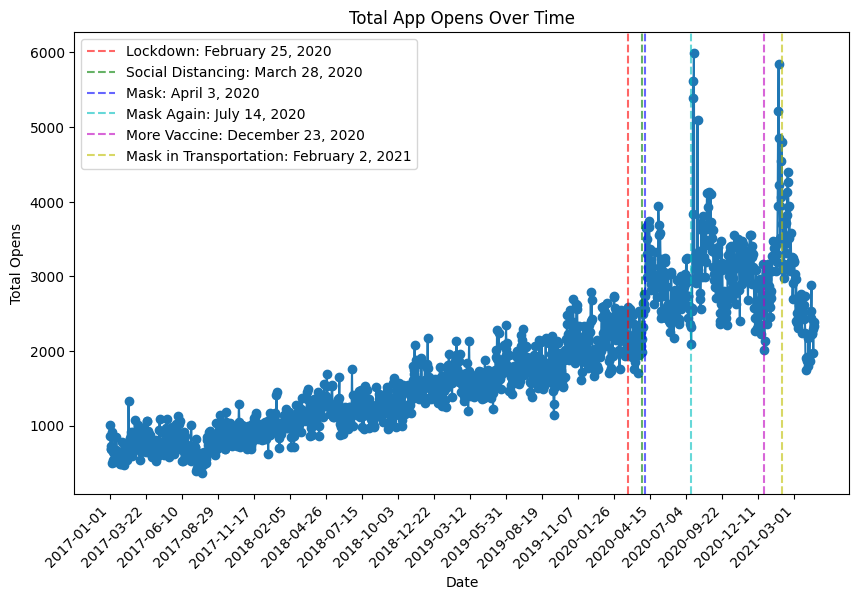

In [139]:
# total_opens_per_day.index = pd.to_datetime(total_opens_per_day.index.str.replace('appOpens.', ''))

plt.figure(figsize=(10, 6))
plt.plot(total_opens_per_day.index, total_opens_per_day['total'], marker='o')
plt.title('Total App Opens Over Time')
plt.xlabel('Date')
plt.ylabel('Total Opens')
plt.xticks(rotation=45, ha='right')
plt.xticks(total_opens_per_day.index[::80], rotation=45)

for date, info in important_dates.items():
    if date in total_opens_per_day.index:
        plt.axvline(x=date, color=info['color'], linestyle='--', label=info['legend'], alpha=0.6)

plt.legend()
plt.show()


In [212]:
print("average total open times per day before 2021-02-01: ", total_opens_per_day[total_opens_per_day.index < '2021-02-01']['total'].mean())
print("average total open times per day after 2021-02-01: ", total_opens_per_day[total_opens_per_day.index >= '2021-02-01']['total'].mean())


average total open times per day before 2021-02-01:  1701.7379356568365
average total open times per day after 2021-02-01:  2834.056338028169


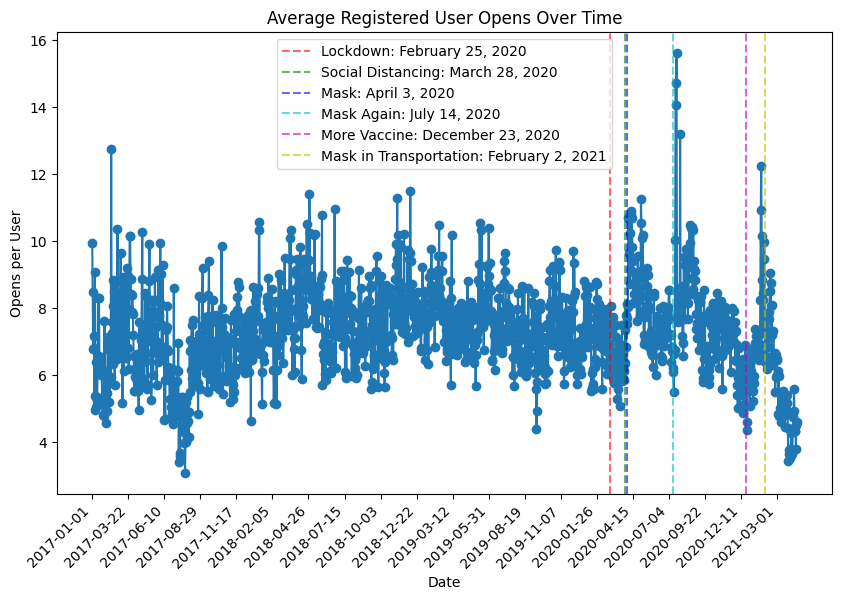

In [228]:
user_df = pd.DataFrame({
    '_id': filtered_df3['_id'],
    'createDate': pd.to_datetime(filtered_df3['user.createDate']),
    'user.gender': filtered_df3['user.gender']
})

user_count_per_day = pd.DataFrame(index=total_opens_per_day.index, columns=['user_count'])
for day in user_count_per_day.index:
    # day_datetime_str = day.replace('appOpens.', '')
    day_datetime = pd.to_datetime(day).tz_localize('UTC')
    
    registered_users = user_df[user_df['createDate'] <= day_datetime]
    user_count_per_day.loc[day, 'user_count'] = len(registered_users)
opens_per_user_per_day = total_opens_per_day['total'] / user_count_per_day['user_count']

# opens_per_user_per_day.index = pd.to_datetime(opens_per_user_per_day.index.str.replace('appOpens.', ''))

plt.figure(figsize=(10, 6))
plt.plot(opens_per_user_per_day.index, opens_per_user_per_day.values, marker='o')
plt.title('Average Registered User Opens Over Time')
plt.xlabel('Date')
plt.ylabel('Opens per User')
plt.xticks(rotation=45, ha='right')
plt.xticks(opens_per_user_per_day.index[::80], rotation=45)

for date, info in important_dates.items():
    if date in total_opens_per_day.index:
        plt.axvline(x=date, color=info['color'], linestyle='--', label=info['legend'], alpha=0.6)
plt.legend()
plt.show()

In [227]:
opens_per_user_per_day.mean()

7.300122517681207

In [229]:
print("Average Registered User Opens Over Time 2021-02-01: ", opens_per_user_per_day[opens_per_user_per_day.index < '2021-02-01'].mean())
print("Average Registered User Opens Over Time 2021-02-01: ", opens_per_user_per_day[opens_per_user_per_day.index >= '2021-02-01'].mean())

Average Registered User Opens Over Time 2021-02-01:  7.376076243246813
Average Registered User Opens Over Time 2021-02-01:  5.704024510020842


##### active user average (didn't do it. it takes too much computation power)

In [ ]:
# user_df = pd.DataFrame({
#     '_id': filtered_df3['_id'],
#     'createDate': pd.to_datetime(filtered_df3['user.createDate']),
#     'user.gender': filtered_df3['user.gender']
# })

# def is_user_active(target_date, window_days=2):
#     # Convert to Timestamp for consistency
#     target_datetime = pd.Timestamp(target_date)
#     window_start = target_datetime - pd.Timedelta(days=window_days)
#     window_end = target_datetime + pd.Timedelta(days=window_days)

#     male_pop = filtered_df3[filtered_df3['user.gender'] == 'M']
#     male_active = 0
#     for i in user_df['_id']:
#         df = male_pop[male_pop['_id'] == i]
#         window_values = df.loc[:, (df.columns >= f'appOpens.{window_start.date()}') & (df.columns <= f'appOpens.{window_end.date()}')]
#         values = window_values.values.sum()
#         if values > 1: male_active += 1

#     female_pop = filtered_df3[filtered_df3['user.gender'] == 'F']
#     female_active = 0
#     for i in user_df['_id']:
#         df = female_pop[female_pop['_id'] == i]
#         window_values = df.loc[:, (df.columns >= f'appOpens.{window_start.date()}') & (df.columns <= f'appOpens.{window_end.date()}')]
#         values = window_values.values.sum()
#         if values > 1: female_active += 1

#     total_active = male_active + female_active
#     return male_active, female_active, total_active

# active_user_count_per_day = pd.DataFrame(index=total_opens_per_day.index, columns=['male_active', 'female_active', 'total_active'])

# for day in active_user_count_per_day.index:
#     male_active, female_active, total_active = is_user_active(day, window_days=2)
#     active_user_count_per_day.loc[day] = [male_active, female_active, total_active]

# plt.figure(figsize=(10, 6))
# plt.plot(active_user_count_per_day.index, active_user_count_per_day['female_active'], label='Female Active', marker='o')
# plt.plot(active_user_count_per_day.index, active_user_count_per_day['male_active'], label='Male Active', marker='o')
# plt.plot(active_user_count_per_day.index, active_user_count_per_day['total_active'], label='Total Active', marker='o')
# plt.title('Active Users Over Time by Gender')
# plt.xlabel('Date')
# plt.ylabel('Active User Count')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()


In [26]:
selected_columns = ['_id'] + [col for col in filtered_df3.columns if col.startswith('appOpens.')]
df = filtered_df3[selected_columns]
df = df.set_index('_id')
total_opens_per_day = df.sum(axis=0)
total_opens_per_day

appOpens.2017-01-01    1004.0
appOpens.2017-01-02     857.0
appOpens.2017-01-03     684.0
appOpens.2017-01-04     724.0
appOpens.2017-01-05     688.0
                        ...  
appOpens.2021-04-10    2234.0
appOpens.2021-04-11    2294.0
appOpens.2021-04-12    1968.0
appOpens.2021-04-13    2335.0
appOpens.2021-04-14    2383.0
Length: 1563, dtype: float64

In [73]:
total_opens_per_day = pd.DataFrame()
selected_columns = ['_id'] + [col for col in filtered_df3.columns if col.startswith('appOpens.')]
df = filtered_df3[selected_columns]
df_woman = filtered_df3[filtered_df3['user.gender'] == "F"][selected_columns]
df_man = filtered_df3[filtered_df3['user.gender'] == "M"][selected_columns]

df = df.set_index('_id')
df_woman = df_woman.set_index('_id')
df_man = df_man.set_index('_id')

total_opens_per_day['total'] = df.sum(axis=0)
total_opens_per_day['male'] = df_man.sum(axis=0)
total_opens_per_day['female'] = df_woman.sum(axis=0)

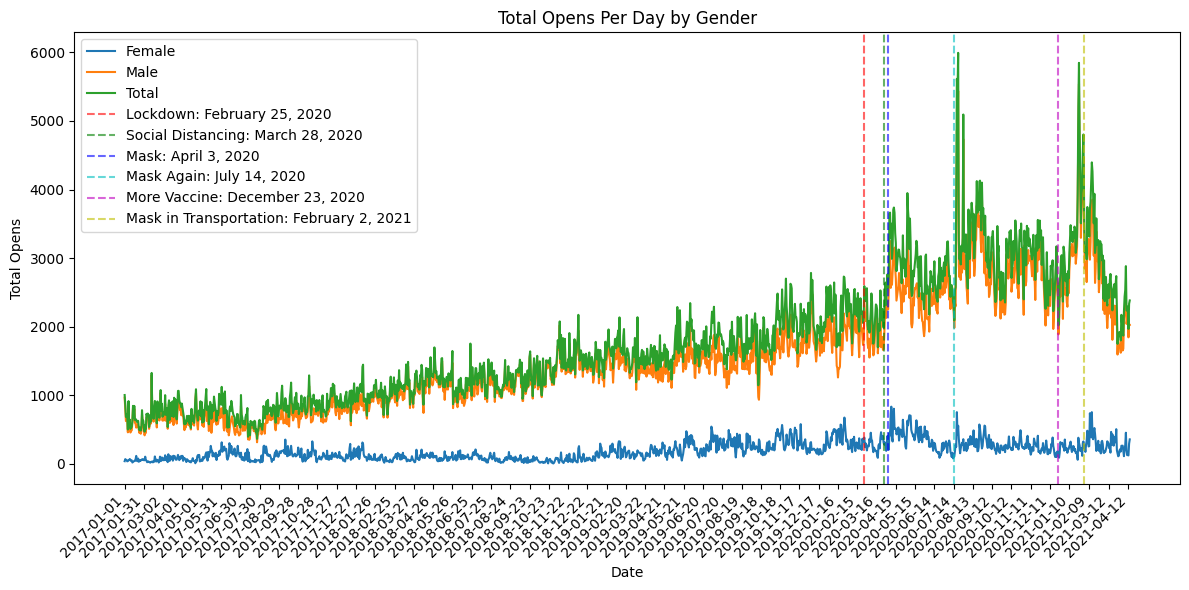

In [179]:
# total_opens_per_day.index = pd.to_datetime(total_opens_per_day.index.str.replace('appOpens.', ''))

plt.figure(figsize=(12, 6))
plt.plot(total_opens_per_day.index, total_opens_per_day['female'], label='Female')
plt.plot(total_opens_per_day.index, total_opens_per_day['male'], label='Male')
plt.plot(total_opens_per_day.index, total_opens_per_day['total'], label='Total')
plt.title('Total Opens Per Day by Gender')
plt.xlabel('Date')
plt.ylabel('Total Opens')
plt.xticks(total_opens_per_day.index[::30], rotation=45, ha='right')

for date, info in important_dates.items():
    if date in total_opens_per_day.index:
        plt.axvline(x=date, color=info['color'], linestyle='--', label=info['legend'], alpha=0.6)
plt.legend()
plt.tight_layout() 
plt.show()

In [232]:
print("male - Average total open per day Over Time 2021-02-01: ", total_opens_per_day[total_opens_per_day.index < '2021-02-01']['male'].mean())
print("male - Average total open per day Over Time 2021-02-01: ", total_opens_per_day[total_opens_per_day.index >= '2021-02-01']['male'].mean())

print("female - Average total open per day Over Time 2021-02-01: ", total_opens_per_day[total_opens_per_day.index < '2021-02-01']['female'].mean())
print("female - Average total open per day Over Time 2021-02-01: ", total_opens_per_day[total_opens_per_day.index >= '2021-02-01']['female'].mean())

male - Average total open per day Over Time 2021-02-01:  1516.3605898123324
male - Average total open per day Over Time 2021-02-01:  2543.6619718309857
female - Average total open per day Over Time 2021-02-01:  185.37734584450402
female - Average total open per day Over Time 2021-02-01:  290.3943661971831


#### Tinder User Gender Imbalance

In [29]:
len(filtered_df3[filtered_df3['user.gender']=='M'])/len(filtered_df3)

0.8620689655172413

In [138]:
## number of male and female data points:
print('how many female data: ', len(filtered_df3[filtered_df3['user.gender']=='F']))
print('female percentage: ', len(filtered_df3[filtered_df3['user.gender']=='F'])/len(filtered_df3))
print('how many male data: ', len(filtered_df3[filtered_df3['user.gender']=='M']))
print('male percentage: ', len(filtered_df3[filtered_df3['user.gender']=='M'])/len(filtered_df3))

how many female data:  88
female percentage:  0.13793103448275862
how many male data:  550
male percentage:  0.8620689655172413


"Concerning the gender ratio: Tinder has the worst with 21.9% women and 78.1% men."  
"Tinder has a gender imbalance, with 75% of users identifying as male."

#### Swipe Right

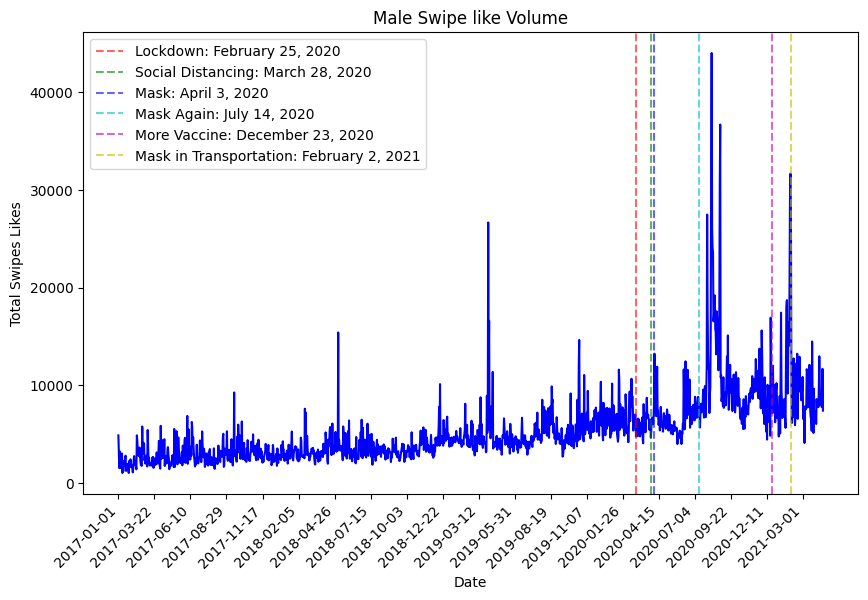

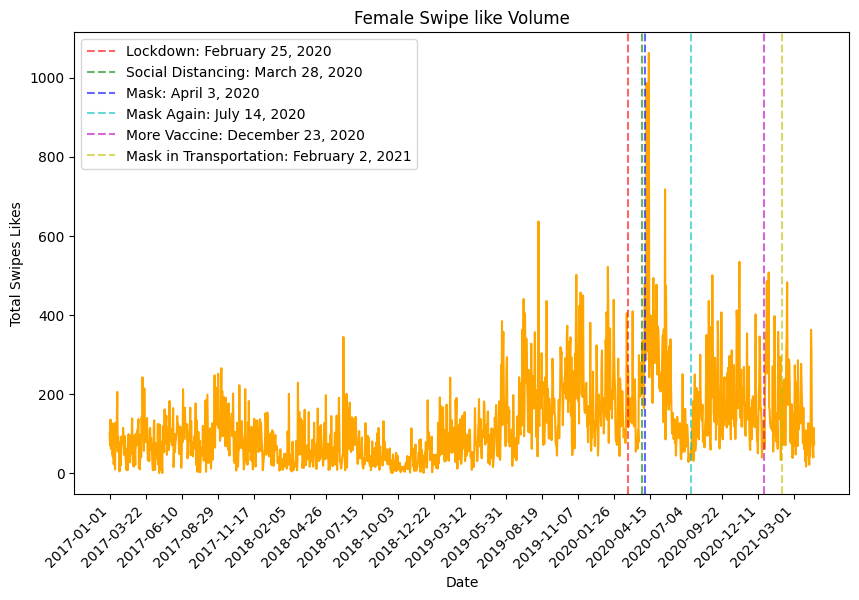

In [146]:
swipe_right_per_day = pd.DataFrame()
selected_columns = ['_id'] + [col for col in filtered_df3.columns if col.startswith('swipes.likes')]
df = filtered_df3[selected_columns]
df_woman = filtered_df3[filtered_df3['user.gender'] == "F"][selected_columns]
df_man = filtered_df3[filtered_df3['user.gender'] == "M"][selected_columns]

df = df.set_index('_id')
df_woman = df_woman.set_index('_id')
df_man = df_man.set_index('_id')

swipe_right_per_day['total'] = df.sum(axis=0)
swipe_right_per_day['male'] = df_man.sum(axis=0)
swipe_right_per_day['female'] = df_woman.sum(axis=0)

# Important COVID timeline dates
covid_dates = {
    'Lockdown': '2020-02-25',
    'Social Distancing': '2020-03-28',
    'Mask': '2020-04-03',
    'Mask Again': '2020-07-14',
    'More Vaccine': '2020-12-23',
    'Mask in Transportation': '2021-02-02',
    'Travel if Vaccinated': '2021-04-02',
    'No Mask Requirement': '2022-05-31'
}

swipe_right_per_day.index = pd.to_datetime(swipe_right_per_day.index.str.replace('swipes.likes.', ''))


# Plotting Female Swipe like
plt.figure(figsize=(10, 6))
plt.plot(swipe_right_per_day.index, swipe_right_per_day['male'], color='blue')
plt.title('Male Swipe like Volume')
plt.xlabel('Date')
plt.ylabel('Total Swipes Likes')
plt.xticks(rotation=45, ha='right')
plt.xticks(swipe_right_per_day.index[::80], rotation=45)



for date, info in important_dates.items():
    if date in swipe_right_per_day.index:
        plt.axvline(x=date, color=info['color'], linestyle='--', label=info['legend'], alpha=0.6)

plt.legend()
plt.show()

# Plotting Male Swipe like
plt.figure(figsize=(10, 6))
plt.plot(swipe_right_per_day.index, swipe_right_per_day['female'], color='orange')
plt.title('Female Swipe like Volume')
plt.xlabel('Date')
plt.ylabel('Total Swipes Likes')
plt.xticks(rotation=45, ha='right')
plt.xticks(swipe_right_per_day.index[::80], rotation=45)

for date, info in important_dates.items():
    if date in swipe_right_per_day.index:
        plt.axvline(x=date, color=info['color'], linestyle='--', label=info['legend'], alpha=0.6)

plt.legend()
plt.show()



In [233]:
print("male - Average swipe like Over Time 2021-02-01: ", swipe_right_per_day[swipe_right_per_day.index < '2021-02-01']['male'].mean())
print("male - Average swipe like Over Time 2021-02-01: ", swipe_right_per_day[swipe_right_per_day.index >= '2021-02-01']['male'].mean())

print("female - Average swipe like  Over Time 2021-02-01: ", swipe_right_per_day[swipe_right_per_day.index < '2021-02-01']['female'].mean())
print("female - Average swipe like Over Time 2021-02-01: ", swipe_right_per_day[swipe_right_per_day.index >= '2021-02-01']['female'].mean())

male - Average swipe like Over Time 2021-02-01:  5162.05563002681
male - Average swipe like Over Time 2021-02-01:  9304.971830985916
female - Average swipe like  Over Time 2021-02-01:  122.51809651474531
female - Average swipe like Over Time 2021-02-01:  142.42253521126761


#### Swipe Left

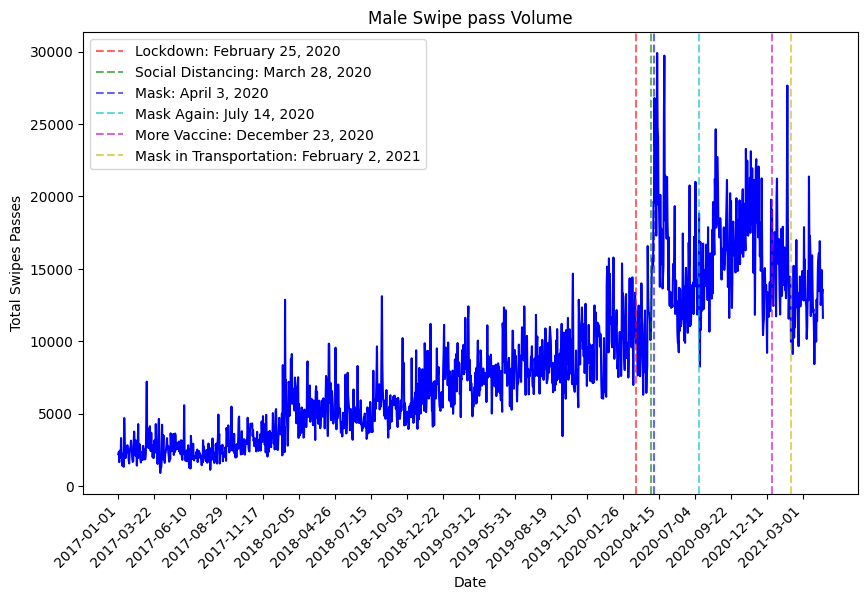

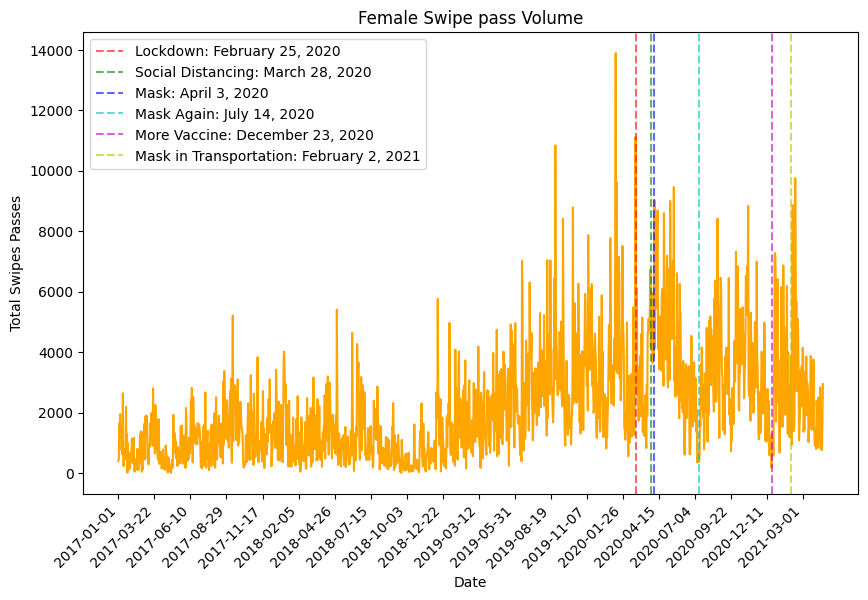

In [151]:
swipe_pass_per_day = pd.DataFrame()
selected_columns = ['_id'] + [col for col in filtered_df3.columns if col.startswith('swipes.passes')]
df = filtered_df3[selected_columns]
df_woman = filtered_df3[filtered_df3['user.gender'] == "F"][selected_columns]
df_man = filtered_df3[filtered_df3['user.gender'] == "M"][selected_columns]

df = df.set_index('_id')
df_woman = df_woman.set_index('_id')
df_man = df_man.set_index('_id')

swipe_pass_per_day['total'] = df.sum(axis=0)
swipe_pass_per_day['male'] = df_man.sum(axis=0)
swipe_pass_per_day['female'] = df_woman.sum(axis=0)

swipe_pass_per_day.index = pd.to_datetime(swipe_pass_per_day.index.str.replace('swipes.passes.', ''))


plt.figure(figsize=(10, 6))
plt.plot(swipe_pass_per_day.index, swipe_pass_per_day['male'], color='blue')
plt.title('Male Swipe pass Volume')
plt.xlabel('Date')
plt.ylabel('Total Swipes Passes')
plt.xticks(rotation=45, ha='right')
plt.xticks(swipe_right_per_day.index[::80], rotation=45)

for date, info in important_dates.items():
    if date in swipe_pass_per_day.index:
        plt.axvline(x=date, color=info['color'], linestyle='--', label=info['legend'], alpha=0.6)

plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(swipe_pass_per_day.index, swipe_pass_per_day['female'], color='orange')
plt.title('Female Swipe pass Volume')
plt.xlabel('Date')
plt.ylabel('Total Swipes Passes')
plt.xticks(rotation=45, ha='right')
plt.xticks(swipe_pass_per_day.index[::80], rotation=45)

for date, info in important_dates.items():
    if date in swipe_pass_per_day.index:
        plt.axvline(x=date, color=info['color'], linestyle='--', label=info['legend'], alpha=0.6)

plt.legend()
plt.show()


In [234]:
print("male - Average swipe left Over Time 2021-02-01: ", swipe_pass_per_day[swipe_pass_per_day.index < '2021-02-01']['male'].mean())
print("male - Average swipe left Over Time 2021-02-01: ", swipe_pass_per_day[swipe_pass_per_day.index >= '2021-02-01']['male'].mean())

print("female - Average swipe left  Over Time 2021-02-01: ", swipe_pass_per_day[swipe_pass_per_day.index < '2021-02-01']['female'].mean())
print("female - Average swipe left Over Time 2021-02-01: ", swipe_pass_per_day[swipe_pass_per_day.index >= '2021-02-01']['female'].mean())

male - Average swipe left Over Time 2021-02-01:  8079.471849865951
male - Average swipe left Over Time 2021-02-01:  13155.25352112676
female - Average swipe left  Over Time 2021-02-01:  2089.587801608579
female - Average swipe left Over Time 2021-02-01:  2682.0


#### ratio of swipe right and left

In [ ]:
swipe_ratio_table = pd.DataFrame()

swipe_ratio_table['male'] = pd.DataFrame([float(i) / float(j) for i, j in zip(swipe_right_per_day['male'].tolist(), swipe_pass_per_day['male'].tolist())], columns=['male'])
swipe_ratio_table['female'] = pd.DataFrame([float(i) / float(j) for i, j in zip(swipe_right_per_day['female'].tolist(), swipe_pass_per_day['female'].tolist())], columns=['female'])
swipe_ratio_table['total'] = pd.DataFrame([float(i) / float(j) for i, j in zip(swipe_right_per_day['total'].tolist(), swipe_pass_per_day['total'].tolist())], columns=['total'])
swipe_ratio_table['date'] = swipe_right_per_day.index
swipe_ratio_table['date'] = swipe_ratio_table['date'].str.replace('swipes.likes.', '', regex=True)
swipe_ratio_table['date'] = pd.to_datetime(swipe_ratio_table['date'], format='%Y-%m-%d')
swipe_ratio_table = swipe_ratio_table[['date', 'male', 'female', 'total']]

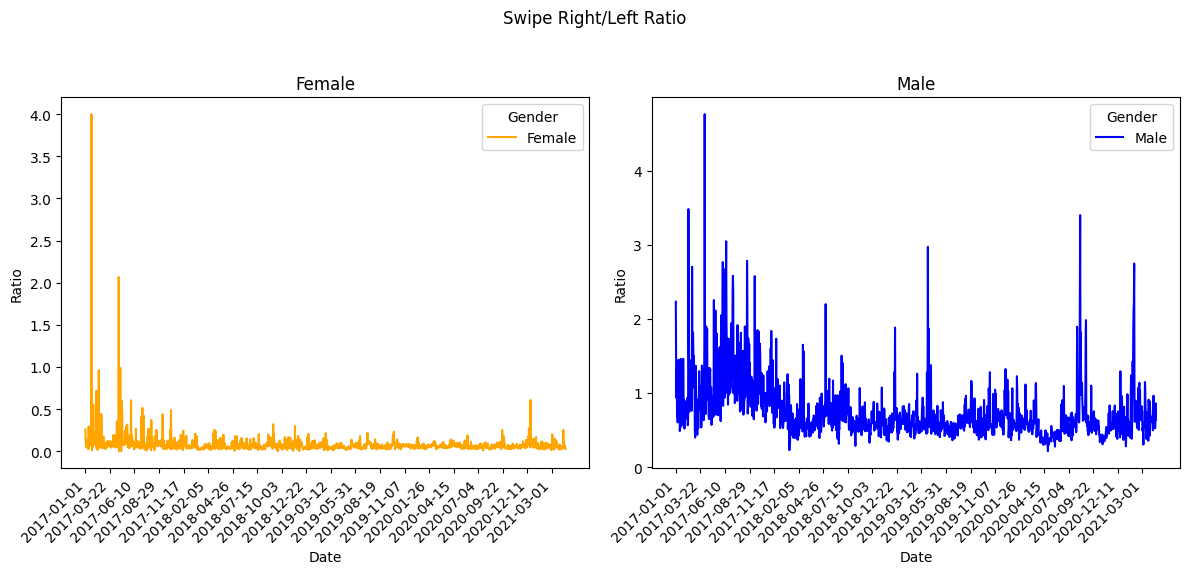

In [34]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(swipe_ratio_table['date'], swipe_ratio_table['female'], label='Female', color = 'orange')
plt.title('Female')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.xticks(swipe_ratio_table['date'][::80], rotation=45, ha='right')
plt.legend(title='Gender')
plt.subplot(1, 2, 2)
plt.plot(swipe_ratio_table['date'], swipe_ratio_table['male'], label='Male', color = 'blue')
plt.title('Male')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.xticks(swipe_ratio_table['date'][::80], rotation=45, ha='right')
plt.legend(title='Gender')

plt.suptitle('Swipe Right/Left Ratio')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


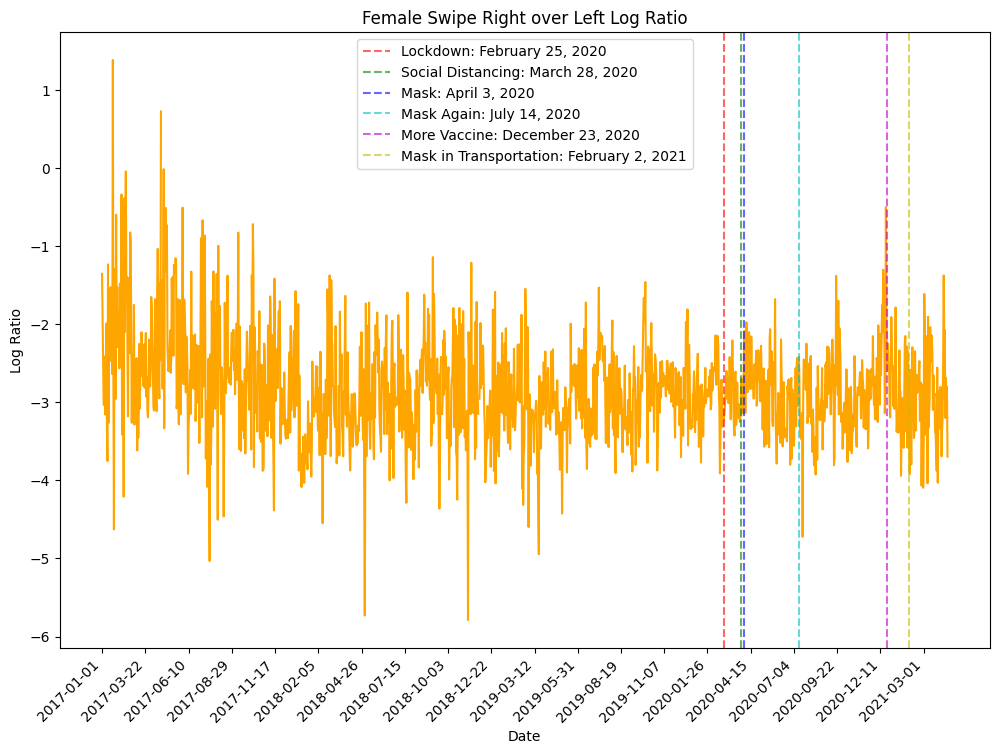

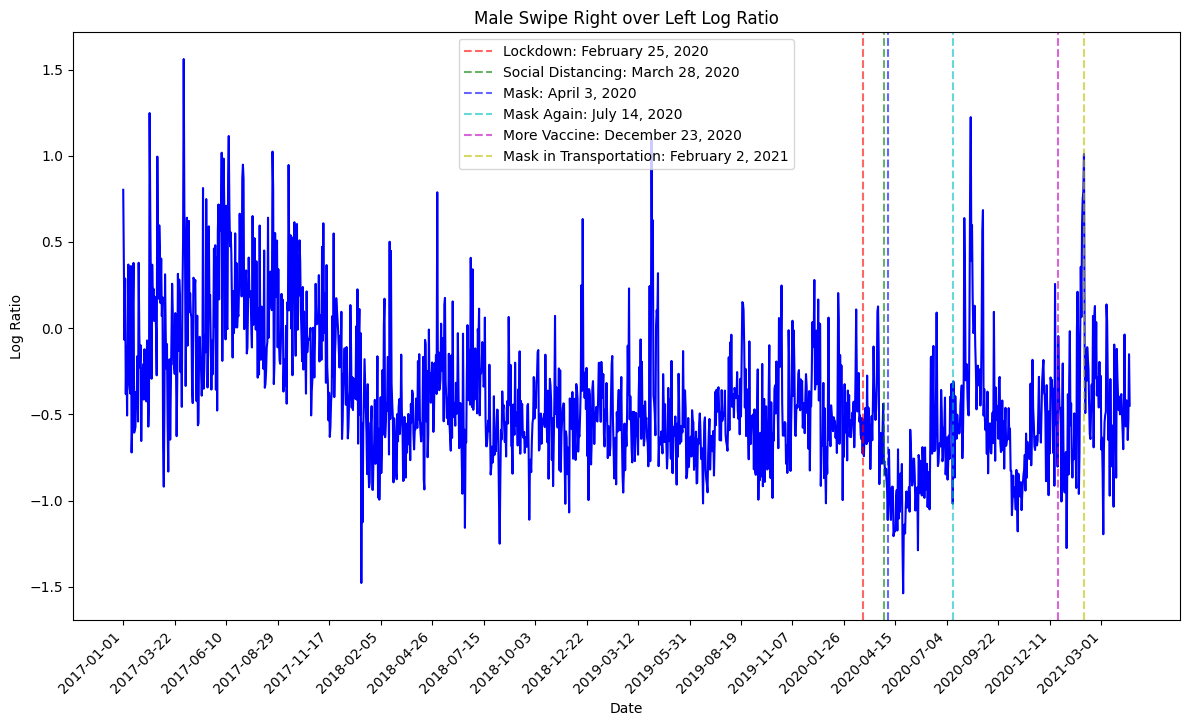

In [181]:

from matplotlib.dates import DateFormatter



lockdown_date = pd.to_datetime('2020-02-25')
distancing_date = pd.to_datetime('2020-03-28')
mask_date = pd.to_datetime('2020-04-03')
mask_again_date = pd.to_datetime('2020-07-14')
vaccine_date = pd.to_datetime('2020-12-23')
transport_mask_date = pd.to_datetime('2021-02-02')
travel_vaccinated_date = pd.to_datetime('2021-04-02')
no_mask_requirement_date = pd.to_datetime('2022-05-31')

# Dictionary of dates, corresponding legends, and colors
important_dates = {
    lockdown_date: {'legend': 'Lockdown: February 25, 2020', 'color': 'r'},
    distancing_date: {'legend': 'Social Distancing: March 28, 2020', 'color': 'g'},
    mask_date: {'legend': 'Mask: April 3, 2020', 'color': 'b'},
    mask_again_date: {'legend': 'Mask Again: July 14, 2020', 'color': 'c'},
    vaccine_date: {'legend': 'More Vaccine: December 23, 2020', 'color': 'm'},
    transport_mask_date: {'legend': 'Mask in Transportation: February 2, 2021', 'color': 'y'},
    travel_vaccinated_date: {'legend': 'Can Travel if Vaccinated: April 2, 2021', 'color': 'k'},
    no_mask_requirement_date: {'legend': 'Not to Wear Mask Requirement: May 31, 2022', 'color': 'orange'}
}


swipe_ratio_table['date'] = pd.to_datetime(swipe_ratio_table['date'])

plt.figure(figsize=(12, 8))
female_log_ratio = np.log(swipe_ratio_table['female'])
female_log_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
plt.plot(swipe_ratio_table['date'], female_log_ratio, color='orange')
plt.title('Female Swipe Right over Left Log Ratio')
plt.xlabel('Date')
plt.ylabel('Log Ratio')
plt.xticks(swipe_ratio_table['date'][::80], rotation=45, ha='right')

for date, info in important_dates.items():
    if date in swipe_ratio_table['date'].values:
        plt.axvline(x=date, color=info['color'], linestyle='--', label=info['legend'], alpha=0.6)

plt.legend()
date_form = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_form)

# Plotting Male Swipe Ratio
plt.figure(figsize=(12, 8))
male_log_ratio = np.log(swipe_ratio_table['male'])
male_log_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
plt.plot(swipe_ratio_table['date'], male_log_ratio, color='blue')
plt.title('Male Swipe Right over Left Log Ratio')
plt.xlabel('Date')
plt.ylabel('Log Ratio')
plt.xticks(swipe_ratio_table['date'][::80], rotation=45, ha='right')

for date, info in important_dates.items():
    if date in swipe_ratio_table['date'].values:
        plt.axvline(x=date, color=info['color'], linestyle='--', label=info['legend'], alpha=0.6)

plt.legend()
plt.gca().xaxis.set_major_formatter(date_form)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

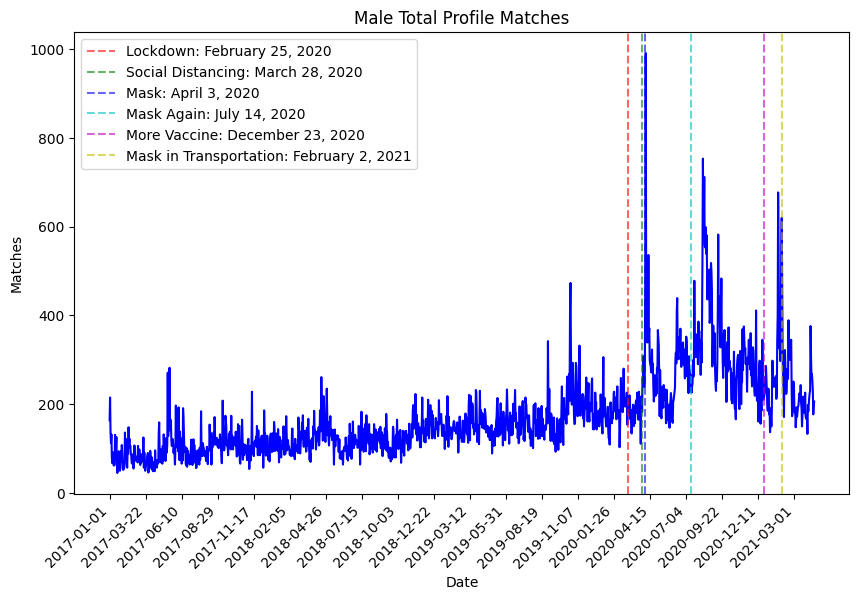

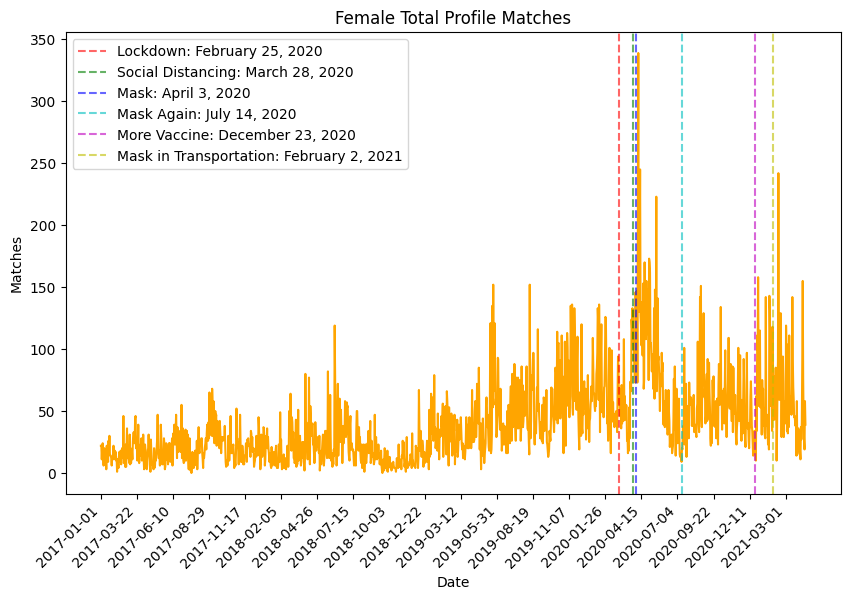

In [155]:

matches_per_day = pd.DataFrame()
selected_columns = ['_id'] + [col for col in filtered_df3.columns if col.startswith('matches')]
df = filtered_df3[selected_columns]
df_woman = filtered_df3[filtered_df3['user.gender'] == "F"][selected_columns]
df_man = filtered_df3[filtered_df3['user.gender'] == "M"][selected_columns]

df = df.set_index('_id')
df_woman = df_woman.set_index('_id')
df_man = df_man.set_index('_id')

matches_per_day['total'] = df.sum(axis=0)
matches_per_day['male'] = df_man.sum(axis=0)
matches_per_day['female'] = df_woman.sum(axis=0)

matches_per_day.index = pd.to_datetime(matches_per_day.index.str.replace('matches.', ''))


# Plotting Female Swipe like
plt.figure(figsize=(10, 6))
plt.plot(matches_per_day.index, matches_per_day['male'], color='blue')
plt.title('Male Total Profile Matches')
plt.xlabel('Date')
plt.ylabel('Matches')
plt.xticks(rotation=45, ha='right')
plt.xticks(matches_per_day.index[::80], rotation=45)

for date, info in important_dates.items():
    if date in swipe_ratio_table['date'].values:
        plt.axvline(x=date, color=info['color'], linestyle='--', label=info['legend'], alpha=0.6)

plt.legend()
plt.show()

# Plotting Male Swipe like
plt.figure(figsize=(10, 6))
plt.plot(matches_per_day.index, matches_per_day['female'], color='orange')
plt.title('Female Total Profile Matches')
plt.xlabel('Date')
plt.ylabel('Matches')
plt.xticks(rotation=45, ha='right')
plt.xticks(matches_per_day.index[::80], rotation=45)

for date, info in important_dates.items():
    if date in swipe_ratio_table['date'].values:
        plt.axvline(x=date, color=info['color'], linestyle='--', label=info['legend'], alpha=0.6)

plt.legend()
plt.show()

In [238]:
print("male - Average mathces Over Time before 2021-02-01: ", matches_per_day[matches_per_day.index < '2021-02-01']['male'].mean())
print("male - Average mathces Over Time after 2021-02-01: ", matches_per_day[matches_per_day.index >= '2021-02-01']['male'].mean())

print("female - Average mathces Over Time before 2021-02-01: ", matches_per_day[matches_per_day.index < '2021-02-01']['female'].mean())
print("female - Average mathces Over Time after 2021-02-01: ", matches_per_day[matches_per_day.index >= '2021-02-01']['female'].mean())

male - Average mathces Over Time before 2021-02-01:  168.89142091152814
male - Average mathces Over Time after 2021-02-01:  238.01408450704224
female - Average mathces Over Time before 2021-02-01:  39.00804289544236
female - Average mathces Over Time after 2021-02-01:  61.267605633802816


### NLP Analysis

In [37]:
conversations_data = [json.loads(conversation) for conversation in filtered_df3['conversations']]

In [38]:
conversations_data[0]

[{'match_id': 'Match 464',
  'messages': [{'to': 463,
    'from': 'You',
    'message': 'Hello again, so now that we matched again, what exactly are you looking for here?',
    'sent_date': 'Tue, 18 Feb 2020 00:34:34 GMT'}]},
 {'match_id': 'Match 463',
  'messages': [{'to': 462,
    'from': 'You',
    'message': 'Most of the girls on this app scare me, but for some reason you seem chill. Maybe it&rsquo;s the fact you like to smile',
    'sent_date': 'Sat, 01 Feb 2020 01:43:24 GMT'},
   {'to': 462,
    'from': 'You',
    'message': 'Dear diary, cute girl vanished... should I send a search party?',
    'sent_date': 'Fri, 07 Feb 2020 00:48:09 GMT'}]},
 {'match_id': 'Match 462',
  'messages': [{'to': 461,
    'from': 'You',
    'message': 'Most of the girls on this app scare me, but for some reason you seem chill. Maybe it&rsquo;s the fact you like the doggos',
    'sent_date': 'Thu, 30 Jan 2020 13:21:25 GMT'},
   {'to': 461,
    'from': 'You',
    'message': 'Well not many people have pho

In [39]:
user_ids = filtered_df3['_id']
user_data = {}
for conversations, user_id in zip(conversations_data, user_ids):
    flat_data = []  # Move this line outside the inner loop
    for match in conversations:
        match_id = match.get('match_id', '')  # Use get to handle missing 'match_id'
        
        # Check if 'messages' key exists in the 'match' dictionary
        if 'messages' in match:
            for message in match['messages']:
                to_user = message.get('to', '')
                message_text = message.get('message', '')
                sent_date = message.get('sent_date', '')
                            
                flat_data.append({
                    'match_id': match_id,
                    'to_user': to_user,
                    'message_text': message_text.strip(),
                    'sent_date': sent_date
                })

    # Check if flat_data is not empty before creating a DataFrame
    if flat_data:
        user_data[user_id] = pd.DataFrame(flat_data)
    else:
        # Handle the case where a user has no matches or messages
        user_data[user_id] = pd.DataFrame(columns=['match_id', 'to_user', 'message_text', 'sent_date'])


#### test google translate

In [40]:
len(user_data)

638

#### test end

In [41]:
# all_conversations_before_covid = ""
# for user, df in user_data.items():
#     df['sent_date'] = pd.to_datetime(df['sent_date'], format='%a, %d %b %Y %H:%M:%S GMT', errors='coerce')
#     start_date = pd.to_datetime('2017-01-01')
#     end_date = pd.to_datetime('2020-01-01')
#     filtered_df = df[(df['sent_date'] >= start_date) & (df['sent_date'] <= end_date)]
#     user_conversations_string = ' '.join(filtered_df['message_text'].astype(str))
#     all_conversations_before_covid += user_conversations_string
# all_conversations_before_covid = ''.join(all_conversations_before_covid)


In [42]:
# stop_words = set(stopwords.words('english'))
# additional_stop_words = {'rsquo', 'sol', 'cuz', 'rpar', 'giphy', 'gif', 'width', 'cid', 'colon','apos', 'di', 'de', 'lpar', 'la', 'da', 'tu', 'do', 'https', 'com', 'ich', 'height'}
# stop_words = set(stopwords.words('english')).union(additional_stop_words)
# vectorizer = CountVectorizer(stop_words=stop_words)
# X = vectorizer.fit_transform([all_conversations_before_covid])
# feature_names = vectorizer.get_feature_names_out()
# word_frequencies = pd.DataFrame(X.toarray(), columns=feature_names)
# most_frequent_words = word_frequencies.sum().sort_values(ascending=False)
# most_frequent_words = pd.DataFrame(most_frequent_words)
# most_frequent_words = most_frequent_words.reset_index()	
# most_frequent_words = most_frequent_words.rename(columns={"index": "Word", 0: "Count"})	
# emojis = [c for c in all_conversations_before_covid if c in emoji.EMOJI_DATA]
# emoji_frequencies_before_covid = pd.Series(emojis).value_counts()
# emoji_frequencies_before_covid = pd.DataFrame(emoji_frequencies_before_covid)
# emoji_frequencies_before_covid = emoji_frequencies_before_covid.reset_index()	
# emoji_frequencies_before_covid = emoji_frequencies_before_covid.rename(columns={"index": "Emoji", 0: "Count"})	

In [45]:
# # before covid 2020-01-01
# all_conversations_before_covid = ""
# for user, df in user_data.items():
#     df['sent_date'] = pd.to_datetime(df['sent_date'], format='%a, %d %b %Y %H:%M:%S GMT', errors='coerce')
#     start_date = pd.to_datetime('2017-01-01')
#     end_date = pd.to_datetime('2020-01-01')
#     filtered_df = df[(df['sent_date'] >= start_date) & (df['sent_date'] <= end_date)]
#     user_conversations_string = ' '.join(filtered_df['message_text'].astype(str))
#     all_conversations_before_covid += user_conversations_string
# all_conversations_before_covid = ''.join(all_conversations_before_covid)

output_file_path = '/Users/susanliang/Desktop/CEU-General/3rd year/Research Method/extra_tinderProject/all_conversations_before_covid.txt'

with open(output_file_path, 'r', encoding='utf-8') as translated_file:
    all_conversations_before_covid = translated_file.read()

stop_words = set(stopwords.words('english'))
additional_stop_words = {'rsquo', 'sol', 'cuz', 'rpar', 'giphy', 'gif', 'width', 'cid', 'colon','apos', 'di', 'de', 'lpar', 'la', 'da', 'tu', 'do', 'https', 'com', 'ich', 'height'}
stop_words = set(stopwords.words('english')).union(additional_stop_words)
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform([all_conversations_before_covid])
feature_names = vectorizer.get_feature_names_out()
word_frequencies = pd.DataFrame(X.toarray(), columns=feature_names)
most_frequent_words_before_covid = word_frequencies.sum().sort_values(ascending=False)
most_frequent_words_before_covid = pd.DataFrame(most_frequent_words_before_covid)
most_frequent_words_before_covid = most_frequent_words_before_covid.reset_index()	
most_frequent_words_before_covid = most_frequent_words_before_covid.rename(columns={"index": "Word", 0: "Count"})	
emojis = [c for c in all_conversations_before_covid if c in emoji.EMOJI_DATA]
emoji_frequencies_before_covid = pd.Series(emojis).value_counts()
emoji_frequencies_before_covid = pd.DataFrame(emoji_frequencies_before_covid)
emoji_frequencies_before_covid = emoji_frequencies_before_covid.reset_index()	
emoji_frequencies_before_covid = emoji_frequencies_before_covid.rename(columns={"index": "Emoji", 0: "Count"})	


In [46]:
# # when covid starts 2020-01-02, 2021-04-14
# all_conversations_when_covid = ""
# for user, df in user_data.items():
#     df['sent_date'] = pd.to_datetime(df['sent_date'], format='%a, %d %b %Y %H:%M:%S GMT', errors='coerce')
#     start_date = pd.to_datetime('2020-01-02')
#     end_date = pd.to_datetime('2021-04-14')
#     filtered_df = df[(df['sent_date'] >= start_date) & (df['sent_date'] <= end_date)]
#     user_conversations_string = ' '.join(filtered_df['message_text'].astype(str))
#     all_conversations_when_covid += user_conversations_string
# all_conversations_when_covid = ''.join(all_conversations_when_covid)

output_file_path = '/Users/susanliang/Desktop/CEU-General/3rd year/Research Method/extra_tinderProject/all_conversations_when_covid.txt'

with open(output_file_path, 'r', encoding='utf-8') as translated_file:
    all_conversations_when_covid = translated_file.read()

stop_words = set(stopwords.words('english'))

additional_stop_words = {'rsquo', 'sol', 'cuz', 'rpar', 'giphy', 'gif', 'width', 'cid', 'colon','apos', 'di', 'de', 'lpar', 'la', 'da', 'tu', 'do', 'https', 'com', 'ich', 'height', 'die', 'ja'}
stop_words = set(stopwords.words('english')).union(additional_stop_words)
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform([all_conversations_when_covid])
feature_names = vectorizer.get_feature_names_out()
word_frequencies = pd.DataFrame(X.toarray(), columns=feature_names)
most_frequent_words_when_covid = word_frequencies.sum().sort_values(ascending=False)
most_frequent_words_when_covid = pd.DataFrame(most_frequent_words_when_covid)
most_frequent_words_when_covid = most_frequent_words_when_covid.reset_index()   
most_frequent_words_when_covid = most_frequent_words_when_covid.rename(columns={"index": "Word", 0: "Count"})   
emojis = [c for c in all_conversations_when_covid if c in emoji.EMOJI_DATA]
emoji_frequencies_when_covid = pd.Series(emojis).value_counts()
emoji_frequencies_when_covid = pd.DataFrame(emoji_frequencies_when_covid)
emoji_frequencies_when_covid = emoji_frequencies_when_covid.reset_index()   
emoji_frequencies_when_covid = emoji_frequencies_when_covid.rename(columns={"index": "Emoji", 0: "Count"})  


In [119]:
emoji_result = pd.DataFrame()
# rows_to_remove = [10, 11, 14, 18, 21, 22] 
# emoji_frequencies_before_covid = emoji_frequencies_before_covid.drop(rows_to_remove)
# rows_to_remove = [11, 14, 24,36, 41, 42] 
# emoji_frequencies_when_covid = emoji_frequencies_when_covid.drop(rows_to_remove)
emoji_result['before covid'] = emoji_frequencies_before_covid['Emoji']
emoji_result['before count'] = emoji_frequencies_before_covid['Count']
emoji_result['during covid'] = emoji_frequencies_when_covid['Emoji']
emoji_result['during count'] = emoji_frequencies_when_covid['Count']


In [111]:
words_frequency_result = pd.DataFrame()
words_frequency_result['before covid'] = most_frequent_words_before_covid['Word']
words_frequency_result['before count'] = most_frequent_words_before_covid['Count']
words_frequency_result['during covid'] = most_frequent_words_when_covid['Word']
words_frequency_result['during count'] = most_frequent_words_when_covid['Count']


In [109]:
# emoji_result['during covid'][:100].to_csv('thisthatduring.csv')

In [184]:
# emoji_result = emoji_result.dropna()
emoji_result[:100].to_csv('emojitoshow.csv')

In [204]:
words_frequency_result[:100].to_csv('frequent.csv')

In [51]:
# file_path = "all_conversations_before_covid.txt"
# with open(file_path, 'w') as file:
#     file.write(all_conversations_before_covid)

# print(f"The string has been saved to {file_path}")

# file_path = "all_conversations_when_covid.txt"
# with open(file_path, 'w') as file:
#     file.write(all_conversations_when_covid)

# print(f"The string has been saved to {file_path}")


In [190]:
first_user = next(iter(user_data.keys()))
first_df = user_data[first_user]
first_df.to_csv('messageexample2.csv')

In [202]:
user_keys = list(user_data.keys())
fifth_user_key = user_keys[78]  # index 4 corresponds to the 5th user
fifth_user_df = user_data[fifth_user_key]
fifth_user_df.to_csv('messageexample10.csv')
# fifth_user_df.to_csv('messageexample3.csv')

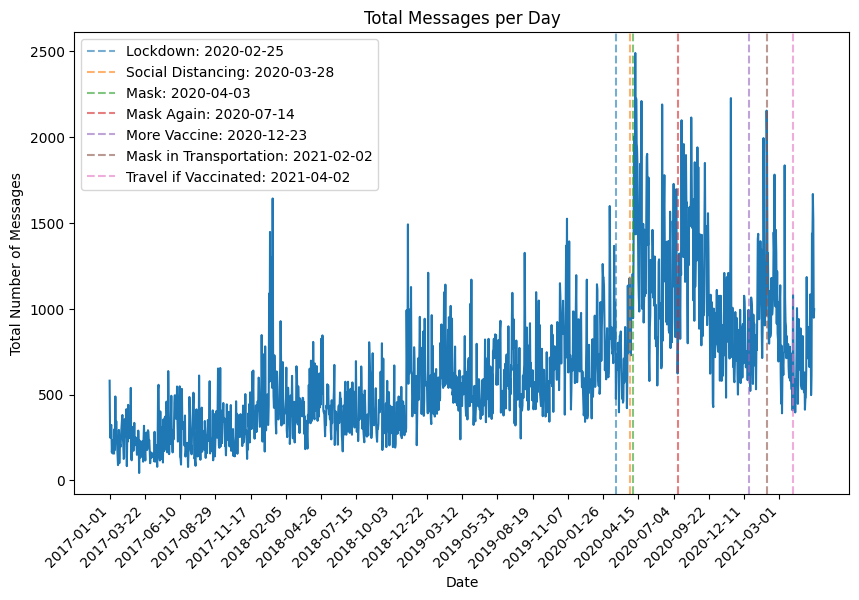

In [187]:
result_df = pd.DataFrame()

for user, df in user_data.items():
    df['sent_date'] = pd.to_datetime(df['sent_date'], errors='coerce')
    messages_per_day = df.groupby(df['sent_date'].dt.date).size().reset_index(name='messages_count')
    messages_per_day['user'] = user
    result_df = result_df.append(messages_per_day)

result_df.reset_index(drop=True, inplace=True)
result_df['messages_count'] = result_df['messages_count'].astype(float)
result_df['sent_date'] = pd.to_datetime(result_df['sent_date']) 
result_df = result_df[result_df['sent_date'] >= '2017-01-01']
total_messages_df = result_df.groupby('sent_date')['messages_count'].sum().reset_index(name='total_messages')

covid_dates = {
    'Lockdown': '2020-02-25',
    'Social Distancing': '2020-03-28',
    'Mask': '2020-04-03',
    'Mask Again': '2020-07-14',
    'More Vaccine': '2020-12-23',
    'Mask in Transportation': '2021-02-02',
    'Travel if Vaccinated': '2021-04-02',
    'No Mask Requirement': '2022-05-31'
}


plt.figure(figsize=(10, 6))
plt.plot(total_messages_df['sent_date'][:1600], total_messages_df['total_messages'][:1600])

plt.title('Total Messages per Day')
plt.xlabel('Date')
plt.ylabel('Total Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.xticks(total_messages_df['sent_date'][:1600][::80], rotation=45)

for i, (event, date_value) in enumerate(covid_dates.items()):  # Update variable name to date_value
    if pd.to_datetime(date_value) in total_messages_df['sent_date'].values:
        line_color = f'C{i}' 
        plt.axvline(x=pd.to_datetime(date_value), color=line_color, linestyle='--', label=f'{event}: {date_value}', alpha=0.6)

plt.legend()
plt.show()

In [239]:
print("average total message per day before 2021-02-01: ", total_messages_df[total_messages_df['sent_date'] < '2021-02-01'].mean())
print("average total message per day after 2021-02-01: ", total_messages_df[total_messages_df['sent_date'] >= '2021-02-01'].mean())

average total message per day before 2021-02-01:  total_messages    616.824397
dtype: float64
average total message per day after 2021-02-01:  total_messages    702.496429
dtype: float64


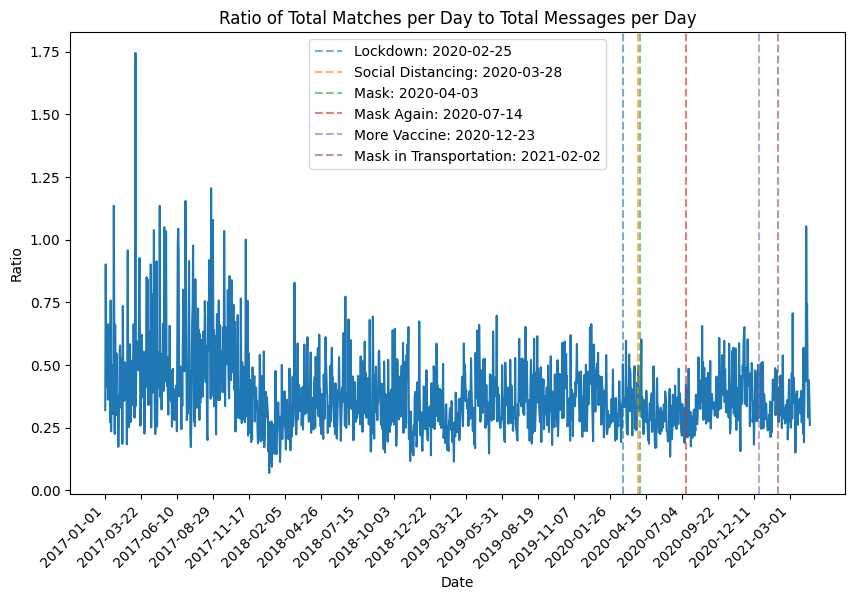

In [156]:
# matches_per_day.index = pd.to_datetime(matches_per_day.index.str.replace('matches.', ''))
merged_df = pd.merge(matches_per_day, total_messages_df, left_index=True, right_on='sent_date', how='inner')
merged_df['ratio'] = merged_df['total'].div(merged_df['total_messages'])
plt.figure(figsize=(10, 6))
plt.plot(merged_df['sent_date'], merged_df['ratio'])

plt.title('Ratio of Total Matches per Day to Total Messages per Day')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.xticks(rotation=45, ha='right')
plt.xticks(merged_df['sent_date'][::80], rotation=45)

for i, (event, date_value) in enumerate(covid_dates.items()):
    if pd.to_datetime(date_value) in merged_df['sent_date'].values:
        line_color = f'C{i}'
        plt.axvline(x=pd.to_datetime(date_value), color=line_color, linestyle='--', label=f'{event}: {date_value}', alpha=0.6)


plt.legend()
plt.show()

In [240]:
print("average match to conversation ratio per day before 2021-02-01: ", merged_df[merged_df['sent_date'] < '2021-02-01'].mean())
print("average match to conversation ratio per day after 2021-02-01: ", merged_df[merged_df['sent_date'] >= '2021-02-01'].mean())

average match to conversation ratio per day before 2021-02-01:  total             207.899464
male              168.891421
female             39.008043
total_messages    616.824397
ratio               0.382761
dtype: float64
average match to conversation ratio per day after 2021-02-01:  total             299.281690
male              238.014085
female             61.267606
total_messages    886.380282
ratio               0.365119
dtype: float64
